<a href="https://colab.research.google.com/github/mohamed-12-4/NYC_taxi_EDA/blob/main/New_York_Taxi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2022-01.parquet

--2022-07-24 14:58:32--  https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2022-01.parquet
Resolving d37ci6vzurychx.cloudfront.net (d37ci6vzurychx.cloudfront.net)... 18.67.3.63, 18.67.3.5, 18.67.3.108, ...
Connecting to d37ci6vzurychx.cloudfront.net (d37ci6vzurychx.cloudfront.net)|18.67.3.63|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 38139949 (36M) [application/x-www-form-urlencoded]
Saving to: ‘yellow_tripdata_2022-01.parquet’

yellow_tripdata_202 100%[===================>]  36.37M  79.6MB/s    in 0.5s    

2022-07-24 14:58:33 (79.6 MB/s) - ‘yellow_tripdata_2022-01.parquet’ saved [38139949/38139949]



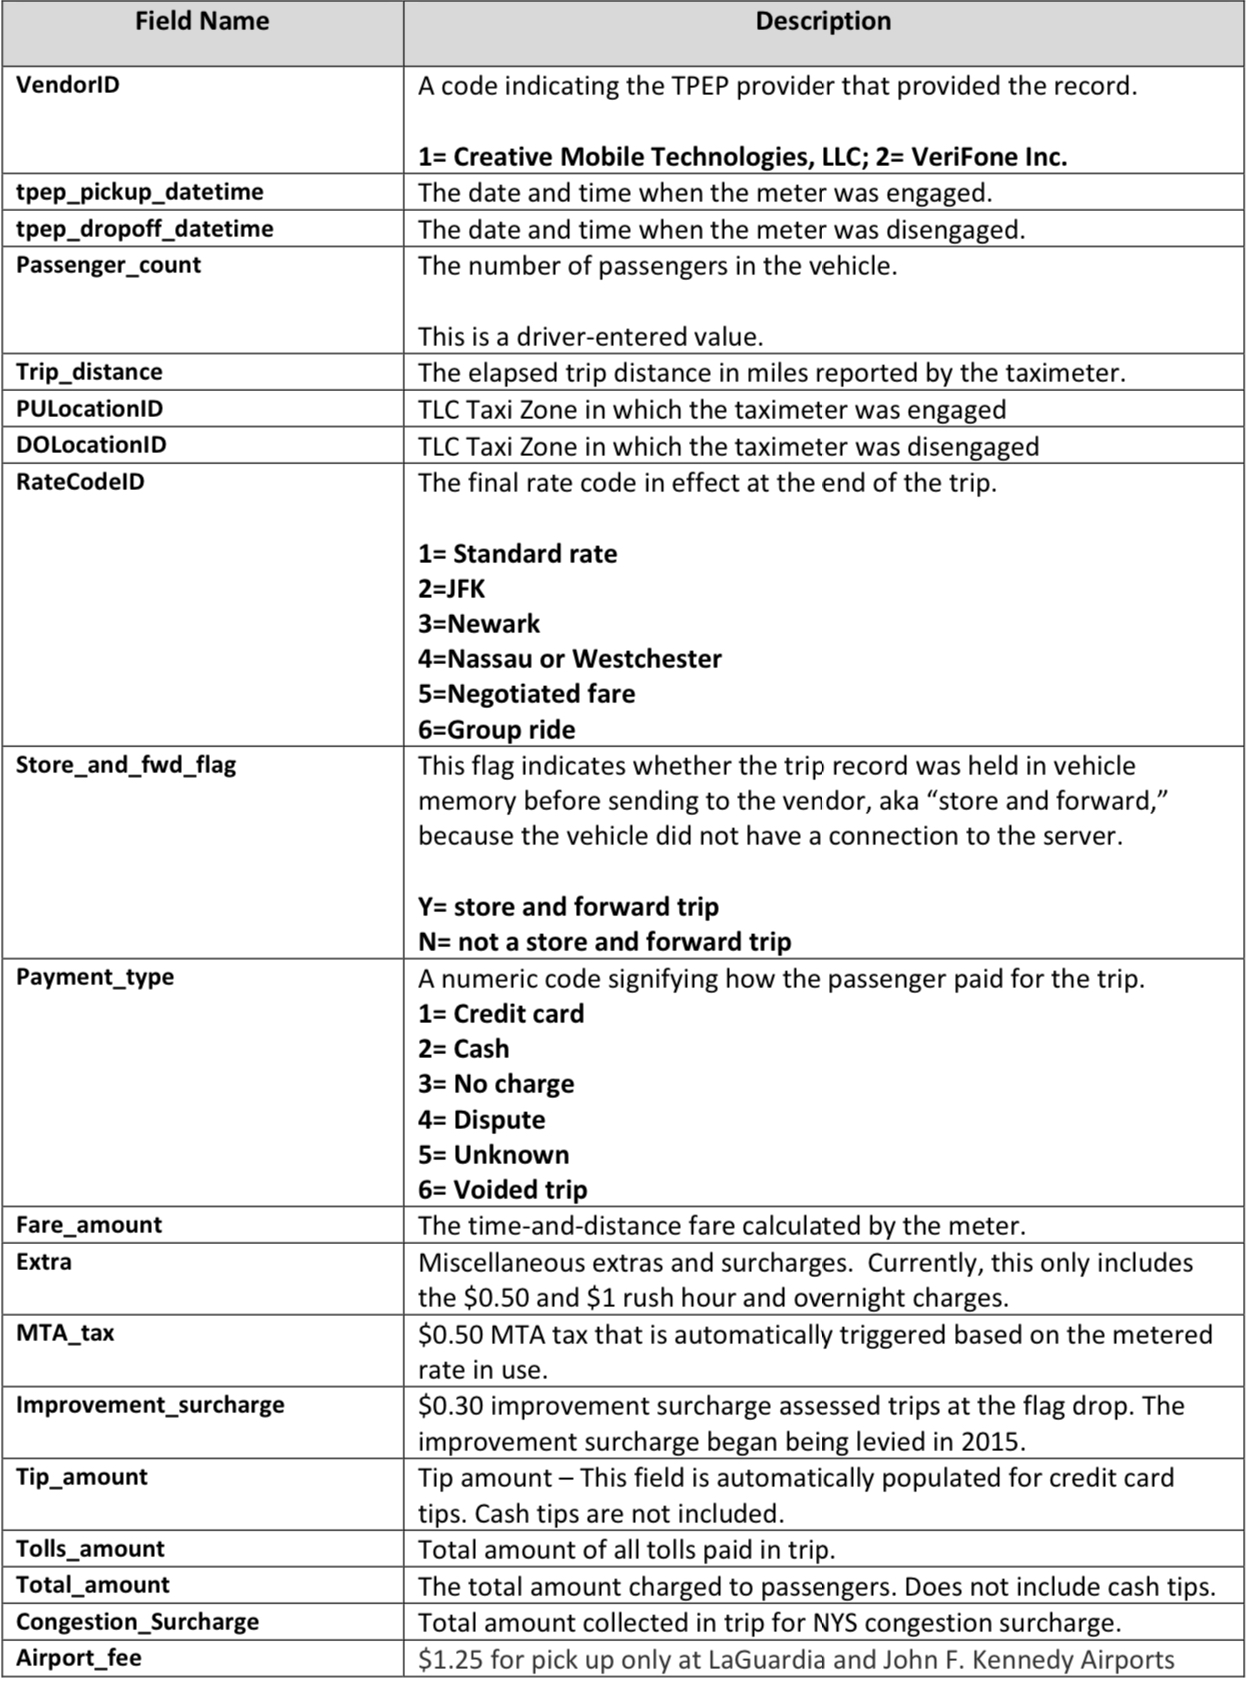

In [ ]:
import plotly.express as plx

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
df = pd.read_parquet("/content/yellow_tripdata_2022-01.parquet")

df.isnull().any()

VendorID                 False
tpep_pickup_datetime     False
tpep_dropoff_datetime    False
passenger_count           True
trip_distance            False
RatecodeID                True
store_and_fwd_flag        True
PULocationID             False
DOLocationID             False
payment_type             False
fare_amount              False
extra                    False
mta_tax                  False
tip_amount               False
tolls_amount             False
improvement_surcharge    False
total_amount             False
congestion_surcharge      True
airport_fee               True
dtype: bool

# Data cleaning 

TODO : 
- check for negative values 
- missing values 
- un reasonable values


In [ ]:
df["passenger_count"].fillna(df.passenger_count.mode()[0], inplace=True)
df["passenger_count"].unique()

array([2., 1., 3., 4., 5., 6., 0., 7., 8., 9.])

In [ ]:
df['fare_amount'] = df['fare_amount'].apply(lambda x: abs(x))

In [ ]:
df["duration"] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60


df["duration"] = df["duration"].apply(lambda x: abs(x))

In [ ]:
df["congestion_surcharge"] = df["congestion_surcharge"].apply(lambda x : abs(x))
df["congestion_surcharge"].fillna(df.congestion_surcharge.mode()[0], inplace=True)
df.congestion_surcharge.unique()

array([2.5 , 0.  , 0.75, 1.  ])

In [ ]:
df["airport_fee"] = df["airport_fee"].apply(lambda x: abs(x))
df["airport_fee"].fillna(0, inplace=True)

In [ ]:
df.isnull().any()

VendorID                 False
tpep_pickup_datetime     False
tpep_dropoff_datetime    False
passenger_count          False
trip_distance            False
RatecodeID                True
store_and_fwd_flag        True
PULocationID             False
DOLocationID             False
payment_type             False
fare_amount              False
extra                    False
mta_tax                  False
tip_amount               False
tolls_amount             False
improvement_surcharge    False
total_amount             False
congestion_surcharge     False
airport_fee              False
duration                 False
dtype: bool

In [ ]:
df["RatecodeID"].fillna(df.RatecodeID.mode()[0], inplace=True)

In [ ]:
df["store_and_fwd_flag"].fillna(df.store_and_fwd_flag.mode()[0], inplace=True)

In [ ]:
df['fare_amount'][df['fare_amount'] == df['fare_amount'].max()] = df['fare_amount'].median()

df['fare_amount'][429859]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


9.0

In [ ]:
df['RatecodeID'][df['RatecodeID'] == 99] = df['RatecodeID'].mode()[0]

df['RatecodeID'].unique()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


array([1., 2., 5., 3., 4., 6.])

# EDA


In [ ]:

table = df.pivot_table(df, index=df['RatecodeID'])
table

,DOLocationID,PULocationID,VendorID,airport_fee,congestion_surcharge,duration,extra,fare_amount,improvement_surcharge,mta_tax,passenger_count,payment_type,tip_amount,tolls_amount,total_amount,trip_distance
RatecodeID,,,,,,,,,,,,,,,,
1.0,163.862320,166.873567,1.706162,0.056581,2.329500,13.461066,0.998610,11.415246,0.296969,0.494557,1.372754,1.192317,2.174715,0.212439,17.338095,4.999005
2.0,153.358990,140.884544,1.739159,0.891471,2.164305,39.051797,1.555755,51.913441,0.292174,0.486671,1.531498,1.240097,8.423781,4.965053,68.561083,17.435494
3.0,44.556303,158.005730,1.725212,0.154148,0.002491,32.740928,0.215267,63.078475,0.284978,0.000000,1.642003,1.403837,8.863505,13.542095,84.790772,16.327045
4.0,250.464721,138.416613,1.750481,1.009461,0.258980,37.780853,0.659718,70.113198,0.296344,0.479314,1.460231,1.390956,7.198954,2.582088,81.336206,21.043784
5.0,179.749650,158.990414,1.829364,0.174674,0.804144,13.521505,0.044174,56.021881,0.279648,0.119423,1.473343,1.235307,6.675309,1.905431,63.742063,4.770800
6.0,124.411765,139.705882,1.705882,0.147059,0.220588,4.083333,0.073529,11.893529,0.264706,0.441176,1.705882,2.294118,0.000000,0.000000,12.672941,0.603529


In [ ]:
plx.bar(table['trip_distance'])

In [ ]:
# create a bar graph shoing the differnce between 